In [1]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
from itertools import cycle, islice
%matplotlib inline
start_time = timer()


In [2]:
data= pd.read_csv('card transactions.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [3]:
data.describe ()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000


In [4]:
print("Amount of Card Transaction Data Missing Value")
data.isnull().sum()

Amount of Card Transaction Data Missing Value


Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3375
Merch description       0
Merch state          1195
Merch zip            4656
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [29]:
data.shape

(96753, 10)

In [30]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [31]:
data.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             93378
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
dtype: int64

In [32]:
goods = data[data['Fraud']== 0]
bads = data[data['Fraud'] ==1]
print('Goods : ', len(goods))
print('Bads : ', len(bads))

Goods :  95694
Bads :  1059


# Numerical Summary Table

In [33]:
numeric=['Amount','Date']
numrecords=len(data)
num=[]
for i in numeric:
    if i == 'Date':
        items=[]
        items.append(i)
        pop= round(((numrecords - data[i].isnull().sum()) / numrecords) * 100,2)
        items.append(pop)
        Min= data[i].min()
        items.append(Min)
        Max= data[i].max ()
        items.append(Max)
        items.append('NA')
        items.append('NA')
        count=0
        for n in data[i]:
            if n ==0:
                count +=1
        zero= round((count / numrecords)*100, 2)
        items.append(zero)
        num.append(items)
    else: 
        items=[]
        items.append(i)
        pop= round(((numrecords - data[i].isnull().sum()) / numrecords) * 100,2)
        items.append(pop)
        Min= data[i].min()
        items.append(Min)
        Max= round(data[i].max(),10)
        items.append(Max)
        Mean= round(data[i].mean(),2)
        items.append(Mean)
        Std= round(data[i]. std(),2)
        items.append(Std)
        count=0
        for n in data[i]:
            if n ==0:
                count +=1
        zero= round((count / numrecords)*100, 2)
        items.append(zero)
        num.append(items)
num

[['Amount', 100.0, 0.01, 3102045.53, 427.89, 10006.14, 0.0],
 ['Date',
  100.0,
  Timestamp('2006-01-01 00:00:00'),
  Timestamp('2006-12-31 00:00:00'),
  'NA',
  'NA',
  0.0]]

In [34]:
numeric_table = pd.DataFrame(num, columns=['Field Name','% Populated', 'Min', 'Max', 'Mean', 'Stdev', '% Zero'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
numeric_table

,Field Name,% Populated,Min,Max,Mean,Stdev,% Zero
0,Amount,100.00,0.01,3102045.53,427.89,10006.14,0.00
1,Date,100.00,2006-01-01 00:00:00,2006-12-31 00:00:00,NA,NA,0.00


# Categorical Summary Table

In [35]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [36]:
categoric= ['Recnum', 'Cardnum', 'Merchnum', 'Merch description', 'Merch state', 'Merch zip', 'Transtype', 'Fraud']
cat=[]
for i in categoric:
    items=[]
    items.append(i)
    pop=((numrecords - data[i].isnull().sum()) / numrecords) * 100
    items.append(pop)
    unique=len(data[i].value_counts())
    items.append(unique)
    common=data[i].value_counts().idxmax()
    items.append(common)
    cat.append(items)
cat

[['Recnum', 100.0, 96753, 2049],
 ['Cardnum', 100.0, 1645, 5142148452],
 ['Merchnum', 96.51173607019938, 13091, '930090121224'],
 ['Merch description', 100.0, 13126, 'GSA-FSS-ADV'],
 ['Merch state', 98.76489617892985, 227, 'TN'],
 ['Merch zip', 95.1877461163995, 4567, 38118.0],
 ['Transtype', 100.0, 4, 'P'],
 ['Fraud', 100.0, 2, 0]]

In [25]:
cat_table = pd.DataFrame(cat, columns=['Field Name','% Populated', '# Unique Values', 'Most Common Value'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cat_table

,Field Name,% Populated,# Unique Values,Most Common Value
0,Recnum,100.00,96753,2049
1,Cardnum,100.00,1645,5142148452
2,Merchnum,96.51,13091,930090121224
3,Merch description,100.00,13126,GSA-FSS-ADV
4,Merch state,98.76,227,TN
5,Merch zip,95.19,4567,38118.00
6,Transtype,100.00,4,P
7,Fraud,100.00,2,0


# Categorical

In [12]:
plt.rcParams.update({'figure.figsize':(10,6)})
plt.rcParams.update({'font.size':20})

## Recnum

Text(0.5, 1.0, 'The most frequently appear record')

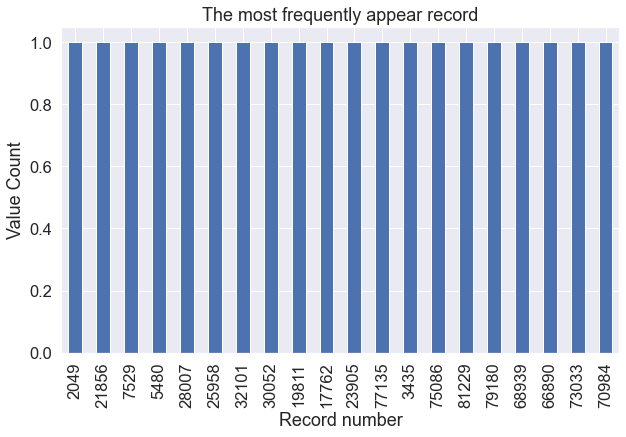

In [13]:
# Record number
sns.set(font_scale=1.5)
data['Recnum'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Record number')
plt.ylabel('Value Count')
plt.title('The most frequently appear record')

## Cardnum

<ipython-input-14-4a391396e430>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear card number')

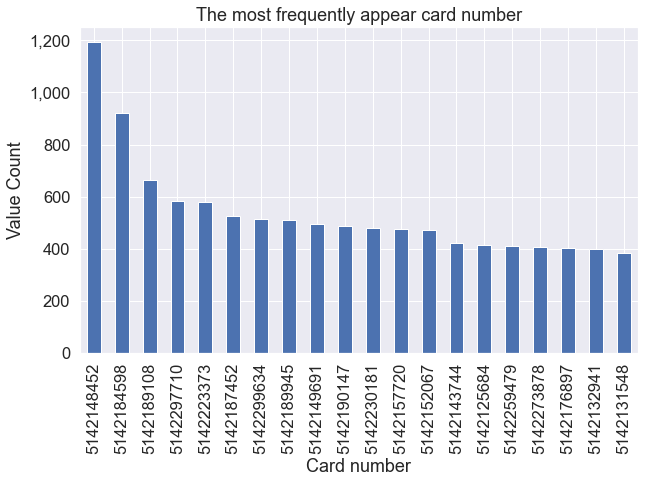

In [14]:
sns.set(font_scale=1.5)
data['Cardnum'].value_counts().head(20).plot(kind='bar')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('Card number')
plt.ylabel('Value Count')
plt.title('The most frequently appear card number')

## Merchnum

Text(0.5, 1.0, 'The most frequently appear merchandise number')

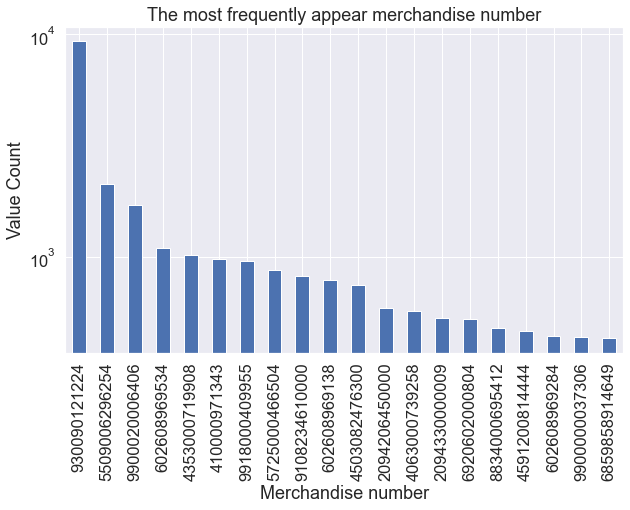

In [15]:
sns.set(font_scale=1.5)
data['Merchnum'].value_counts().head(20).plot(kind='bar')
plt.yscale('log')
plt.xlabel('Merchandise number')
plt.ylabel('Value Count')
plt.title('The most frequently appear merchandise number')

## Merch description

<ipython-input-16-b5b31290a318>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear merchandise description')

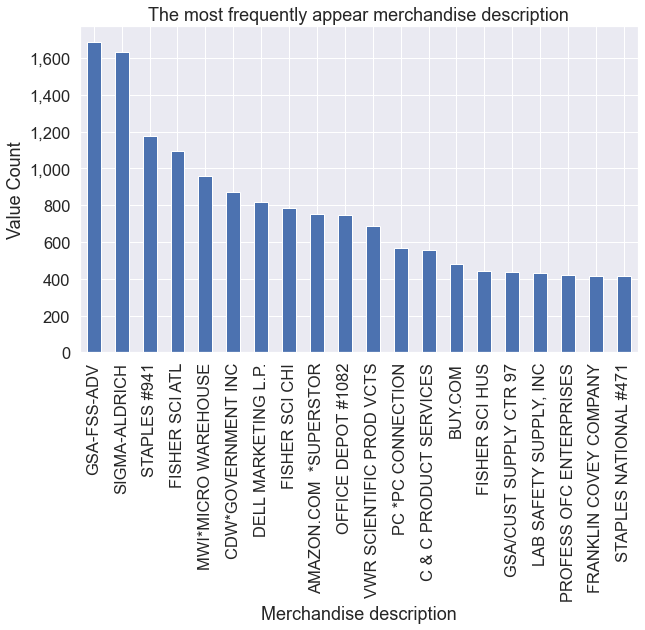

In [16]:
sns.set(font_scale=1.5)
data['Merch description'].value_counts().head(20).plot(kind='bar')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('Merchandise description')
plt.ylabel('Value Count')
plt.title('The most frequently appear merchandise description')

## Merch state

<ipython-input-17-9954e6d025bf>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear merchandise state')

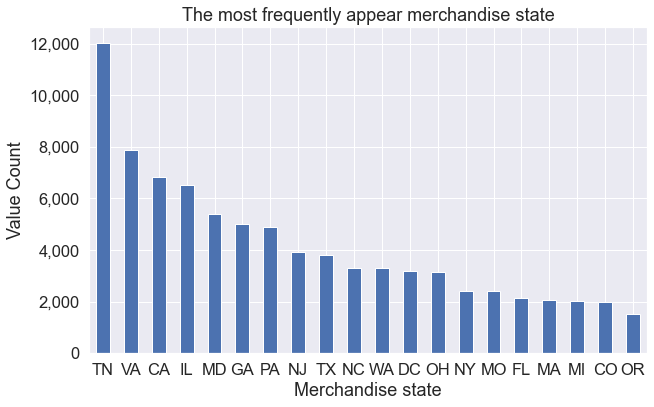

In [17]:
sns.set(font_scale=1.5)
data['Merch state'].value_counts().head(20).plot(kind='bar')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation='horizontal')
plt.xlabel('Merchandise state')
plt.ylabel('Value Count')
plt.title('The most frequently appear merchandise state')

## Merchzip

<ipython-input-25-f325cccb0b90>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear merchandise state')

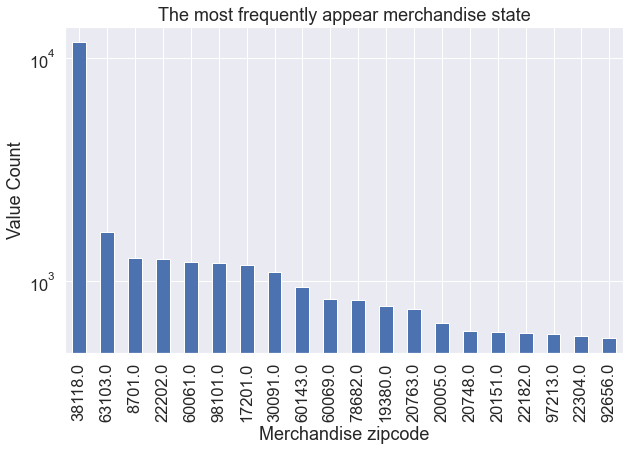

In [25]:
sns.set(font_scale=1.5)
data['Merch zip'].value_counts().head(20).plot(kind='bar')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.yscale('log')
plt.xlabel('Merchandise zipcode')
plt.ylabel('Value Count')
plt.title('The most frequently appear merchandise state')

## Transtype

Text(0.5, 1.0, 'The most frequently appear Transaction Type')

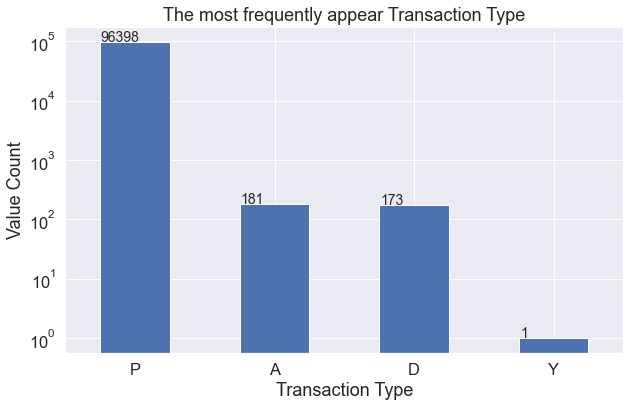

In [19]:
sns.set(font_scale=1.5)
ax=data['Transtype'].value_counts().head(20).plot(kind='bar')
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)
plt.yscale('log')
plt.xticks(rotation='horizontal')
plt.xlabel('Transaction Type')
plt.ylabel('Value Count')
plt.title('The most frequently appear Transaction Type')


## Fraud

Text(0.5, 1.0, 'The most frequently appear fraud label')

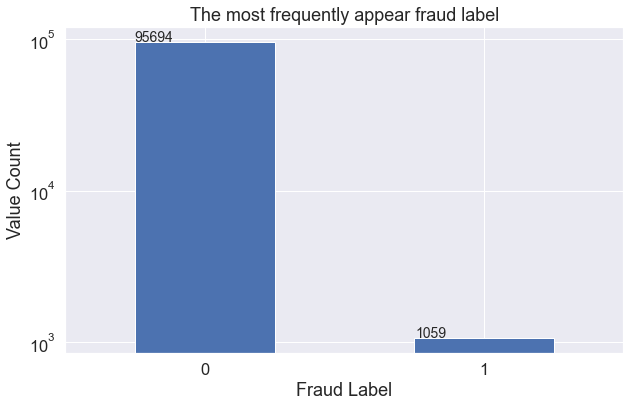

In [20]:
sns.set(font_scale=1.5)

ax=data['Fraud'].value_counts().head(20).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)

plt.yscale('log')
plt.xlabel('Fraud Label')
plt.ylabel('Value Count')
plt.xticks(rotation='horizontal')
plt.title('The most frequently appear fraud label')

# Numerical

## Date

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='Date'>

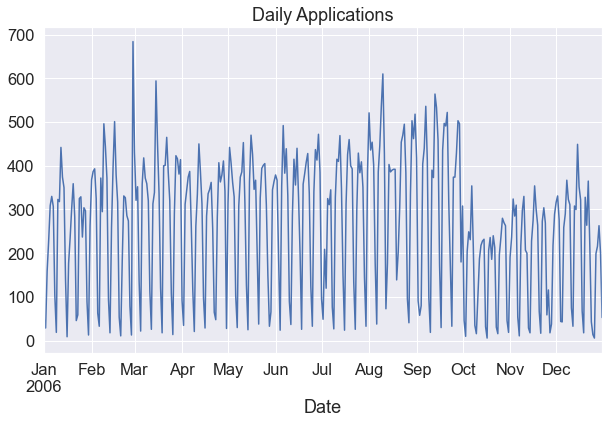

In [21]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 1))\
    .count().apps
daily_count.plot(title = 'Daily Applications')

Text(0.5, 0, 'Date')

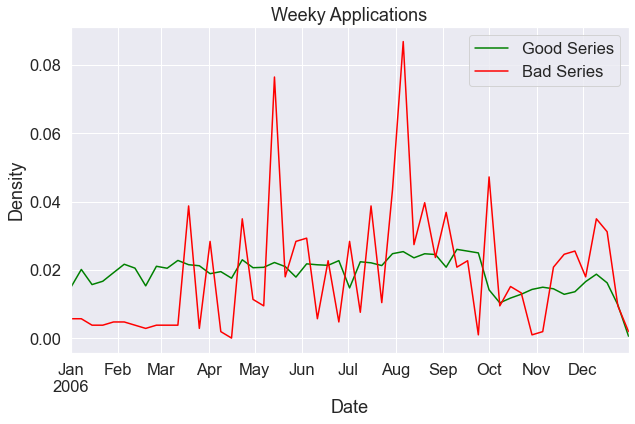

In [22]:
ngoods = len(goods)
nbads = len(bads)

goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 7)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 7)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')
plt.legend(labels=['Good Series','Bad Series'],
           loc='upper right') 
plt.ylabel('Density')
plt.xlabel('Date')

## Amount

/Users/freda/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-42-b415dcbe0ffa>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Amount of the Transaction')

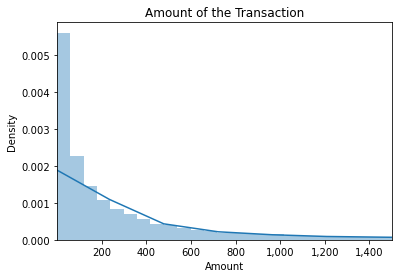

In [42]:
xhigh=data['Amount'].max()
xlow=data['Amount'].min()
plt.xlim(xlow,1500)
plt.ticklabel_format(style='plain', axis='x')
temp = data[data['Amount'] < xhigh]
sns.distplot(temp['Amount'], bins=800, kde=True)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Amount of the Transaction')